In [1]:
from spectral import *
import numpy as np 
import matplotlib.pyplot as plt 
import spectral.io.envi as envi

import pysptools.util as util
import pysptools.eea as eea
import pysptools.abundance_maps as amp
import pysptools.classification as cls
import pysptools.noise as ns
import pysptools.skl as skl
import timeit

ModuleNotFoundError: No module named 'spectral'

In [2]:
data, header = util.load_ENVI_file('EO1H0410362015363110K8.hdr')

In [3]:
data.shape

(4301, 256, 242)

In [4]:
max_rows_index = 4300
max_column_index = 255
max_spectral_index = 241 

In [8]:
def test_functions(data, header):
    startTime = timeit.default_timer()
    print('Endmembers extraction with NFINDR')
    nfindr = eea.NFINDR()
    U = nfindr.extract(data, 5, maxit=5, normalize=True, ATGP_init=True)
    print('Abundance maps generation with NNLS')
    nnls = amp.NNLS()
    amaps = nnls.map(data, U, normalize=True)
    #nnls.display(colorMap='jet', columns=3, suffix='Cuprite')
    print('Abundance maps generation with UCLS')
    ucls = amp.UCLS()
    amaps = ucls.map(data, U, normalize=True)
    #ucls.display(colorMap='jet', columns=3, suffix='Cuprite')
    #km = skl.KMeans()
    #km.predict(data, 4)
    #km.display(interpolation='none', colorMap='Accent', suffix='Cuprite')
    elapsedTime = timeit.default_timer() - startTime
    return elapsedTime

#before_time = test_functions(data,header)
def correlation_coefficient(T1, T2):
    numerator = np.mean((T1 - T1.mean()) * (T2 - T2.mean()))
    denominator = T1.std() * T2.std()
    if denominator == 0:
        return 0
    else:
        result = numerator / denominator
        return result

def remove_bands(X,Y):
    mask = list(range(X, Y))
    REM_ARRAY = np.delete(data, mask, 2)
    return REM_ARRAY

cutoff = 240

X = remove_bands(cutoff,max_spectral_index)
X = remove_bands(cutoff,max_spectral_index)
Y = X.transpose(2,0,1).reshape(cutoff+1,(max_rows_index+1)*(max_column_index+1))

for band_i in range(0,cutoff):
    band_j = band_i+1
    cf = correlation_coefficient(Y[band_i],Y[band_j])
    print(cf)

def time_metric():
    print('Time before removal: ',before_time)
    print('Time after removal: ',after_time)

#time_metric()

def size_comparison():
    new_max_spectral_index = X[0][0].size
    old_load_size_gb = (4*max_rows_index*max_column_index*max_spectral_index/(1024*1024*1024))
    new_load_size_gb = (4*max_rows_index*max_column_index*new_max_spectral_index/(1024*1024*1024))
    old_load_size_mb = (4*max_rows_index*max_column_index*max_spectral_index/(1024*1024))
    new_load_size_mb = (4*max_rows_index*max_column_index*new_max_spectral_index/(1024*1024))
    s = [max_spectral_index,new_max_spectral_index]
    l = [old_load_size_mb,new_load_size_mb]
    PERC_DEC = (old_load_size_mb - new_load_size_mb)*100/old_load_size_mb
    print("Old vs. New load size(GB):")
    print(old_load_size_gb,new_load_size_gb)
    print("Reduction in size(GB):")
    print(old_load_size_gb-new_load_size_gb)
    print("Old vs. New load size(MB):")
    print(old_load_size_mb,new_load_size_mb)
    print("Reduction in size(MB):")
    print(old_load_size_mb-new_load_size_mb)
    print('Percentage Decrease in Size:',PERC_DEC)
    plt.plot(s, l)
    plt.xlabel('No of spectral bands (S)')
    plt.ylabel('Load Size (MB)')
    plt.title('Band vs. Size')
    plt.grid(True)
    plt.savefig("spec1.png")
    plt.show()
    
#size_comparison()

0.8885202
0.96583694
1.0000001
0.8772108
0.14094989
1.0000001
1.0000001
1.0000001
1.0000001
1.0000001
0.7698781
0.75187576
0.97798234
0.9935854
0.996399
0.9968933
0.99397826
0.9968135
0.9983299
0.9976994
0.9976003
0.9984981
0.998962
0.9990754
0.99917954
0.9994722
0.9988999
0.99877626
0.9992391
0.99917114
0.9995012
0.9993445
0.9992279
0.9989947
0.9991908
0.99919426
0.9992404
0.99765295
0.99516654
0.99366194
0.99659085
0.99696493
0.996817
0.99200845
0.9438705
0.96960753
0.9982983
0.99957144
0.9992037
0.9981521
0.9983103
0.9989684
0.9984899
0.9995812
0.9995521
0.99939376
0.99849343
0.99656886
0.9947142
0.99555624
0.9723039
0.88933736
1.0000001
1.0000001
1.0000001
1.0000001
1.0000001
1.0000001
1.0000001
1.0000001
1.0000001
1.0000001
1.0000001
1.0000001
0.50379103
1.0000001
1.0000001
1.0000001
1.0000001
0.8266385
0.5731764
0.9702306
0.8926934
0.99029505
0.97012454
0.98351693
0.9830476
0.9960603
0.9933709
0.99842703
0.9916841
0.9844788
0.9936689
0.99860567
0.99550706
0.9986917
0.99682754
0.9

Old vs. New load size(GB):
5.0 3.90625
Reduction in size(GB):
1.09375
Percentage Decrease in Size: 21.875
Old vs. New load size(GB):
5.0 2.9296875
Reduction in size(GB):
2.0703125
Percentage Decrease in Size: 41.40625
Old vs. New load size(GB):
5.0 1.953125
Reduction in size(GB):
3.046875
Percentage Decrease in Size: 60.9375
Old vs. New load size(GB):
5.0 0.9765625
Reduction in size(GB):
4.0234375
Percentage Decrease in Size: 80.46875
Old vs. New load size(GB):
5.0 0.5859375
Reduction in size(GB):
4.4140625
Percentage Decrease in Size: 88.28125


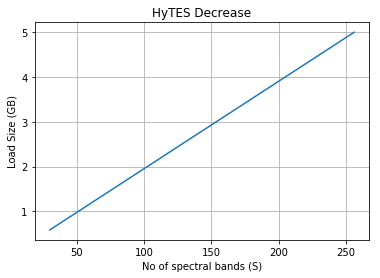

In [7]:
def hytes_size_comparison():
    old_load_size_gb   = (4*10240*512*256/(1024*1024*1024))
    new_load_size_gb_1 = (4*10240*512*200/(1024*1024*1024))
    new_load_size_gb_2 = (4*10240*512*150/(1024*1024*1024))
    new_load_size_gb_3 = (4*10240*512*100/(1024*1024*1024))
    new_load_size_gb_4 = (4*10240*512*50/(1024*1024*1024))
    new_load_size_gb_5 = (4*10240*512*30/(1024*1024*1024))
    s = [256,200,150,100,50,30]
    l = [old_load_size_gb,new_load_size_gb_1,new_load_size_gb_2,new_load_size_gb_3,new_load_size_gb_4,new_load_size_gb_5]
    for i in range(1,6):
        print("Old vs. New load size(GB):")
        print(l[0],l[i])
        print("Reduction in size(GB):")
        print(l[0]-l[i])
        PERC_DEC = (l[0] - l[i])*100/l[0]
        print('Percentage Decrease in Size:',PERC_DEC)
    plt.plot(s, l)
    plt.xlabel('No of spectral bands (S)')
    plt.ylabel('Load Size (GB)')
    plt.title('HyTES Decrease')
    plt.grid(True)
    plt.savefig("HyComparison.png")
    plt.show()

hytes_size_comparison()